# Histogramas

Tanto OpenCV como Numpy tienen funciones para calcular el histograma en un sólo canal. 

La función `np.histogram` de numpy es más sencilla de utilizar y sólo recibe tres parámetros: la matriz con la imagen, el número de *bins* para calcular el histograma y, por último, los valores inicial y final de los *bins*.
La salida de esta función son dos arrays, el primero conteniendo el número de píxeles de cada *bin* y el segundo, los límites de cada bin.

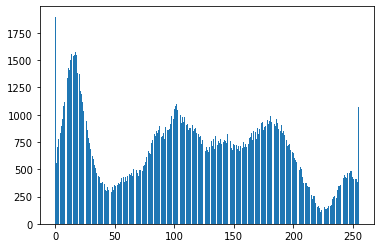

In [1]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

im = cv2.imread('res/butterfly.jpg', cv2.IMREAD_GRAYSCALE)

hist_count, hist_bins = np.histogram(im, 256, [0,256])
plt.bar(range(0,256), hist_count)
plt.show()

## Operaciones con histogramas

### Modificación del rango dinámico
La librería `skimage` contiene la función `rescale_intensity` que permite escalar los valores de intensidad de la imagen. Esta función toma un parámetro obligatorio, la imagen de entrada, y dos parámetros opcionales (`in_range`, `out_range`) mediante los que se pueden especificar los valores mínimos y máximos a escalar.  Aunque existen varias opciones, la forma más habitual de utilizar esta función es pasar `image` a la variable `in_range` y una tupla con los valores mínimos y máximos a la variable `out_range`.

Si no se incluyen estos parámetros opcionales, la imagen se escala a los valores mínimos y máximos permitidos por el tipo de la imagen (0.0 y 1.0 en caso de `float` ó 0 y 255 en caso de `uint8`). 

Si estamos trabajando con valores enteros es necesario convertir el resultado a formato `uint8` usando, por ejemplo, `astype(np.uint8)`.

10 50


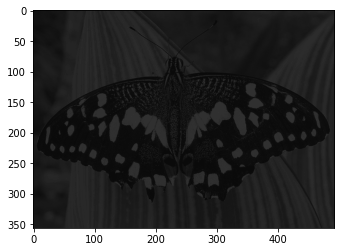

In [2]:
from skimage.exposure import rescale_intensity

out = rescale_intensity(im, in_range='image', out_range=(10,50)).astype(np.int8)
print(np.min(out), np.max(out))

# IMPORTANTE!!!
# Forzamos los valores minimos y maximos de plt.imshow
# para que no escale las intensidades de la imagen
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.show()

### Ejercicio
Amplía el rango dinámico de la imagen `out` a [0,255]. Visualiza la nueva imagen y el histograma generado. Cuántos niveles de gris diferentes tiene la nueva imagen? Por qué?

Nueva imagen out con rango dinámico a [0,255]:


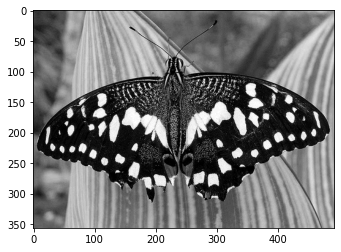

Histograma de out_ampliada: 



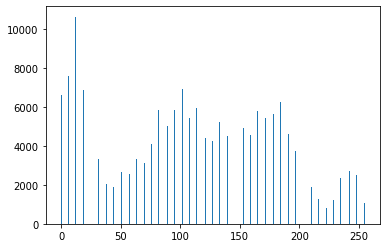

Los niveles de gris son:  41


In [4]:
# Se amplía el rango dinámico de out a [0,255]:
print('Nueva imagen out con rango dinámico a [0,255]:')
out_ampliada = rescale_intensity(out, in_range='image', out_range=(0,255)).astype(np.uint8)
plt.imshow(out_ampliada, cmap='gray', vmin=0, vmax=255)
plt.show()

# El histograma de out_ampliada sería:
print('Histograma de out_ampliada: \n')
hist_count, hist_bins = np.histogram(out_ampliada, 256, [0,256])
plt.bar(range(0,256), hist_count)
plt.show()

# Los niveles de gris diferentes en la imagen:         
print('Los niveles de gris son: ', np.sum(hist_count>0))

Con respecto a los niveles de gris, la nueva imagen consta de los niveles originales como resultado del escalado a los valores de 10 y 50 en intensidad, pues mediante la ampliación del rango dinámico se conduce a los valores
mínimos y máximos de 0 y 255, sin alteración en número de niveles de gris.


### Compresión y expansión del rango dinámico

Por una parte, aplicando el logaritmo a una image reduce el contraste de las regiones más claras, mejorando las zonas más oscuras. Por otra parte, el exponencial permite realizar la operación contraria, esto es, aumentar el contraste de las regiones más claras.

0.0 5.545177444479562


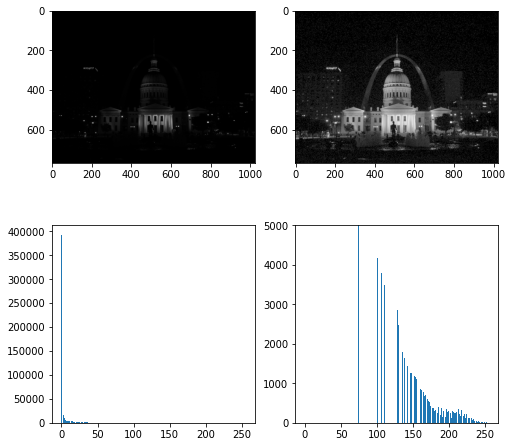

In [5]:
plt.rcParams["figure.figsize"] = [8,8]

im = cv2.imread("res/building.jpg",cv2.IMREAD_GRAYSCALE)
hist_count, _ = np.histogram(im, 256,[0,256])
im_log = np.log(im.astype(float) + 1) # log de 0 no existe: sumamos 1 a toda la imagen
print(np.min(im_log), np.max(im_log))


# Normalizar la imagen entre 0 y 1 
min_im_log, max_im_log = np.min(im_log), np.max(im_log)          
im_log = (im_log - min_im_log) / (max_im_log - min_im_log)

hist_count_im_log, _ = np.histogram(im_log, 256)

f, ax = plt.subplots(2,2)
ax[0,0].imshow(im, cmap='gray')
ax[0,1].imshow(im_log, cmap='gray')
plt.ylim([0,5000])
ax[1,0].bar(range(0,256), hist_count)
ax[1,1].bar(range(0,256), hist_count_im_log)
plt.show()

### Ejercicio
Aplica la función `np.exp` a la imagen `town.jpg`. Visualiza la imagen antes y despues de aplicar la función. *Hint*: convierte la imagen a float y normaliza los valores de los píxeles entre 0 y 1 antes de calcular el exponencial.


 Se muestran las imágenes antes y después de aplicar la función exponencial:


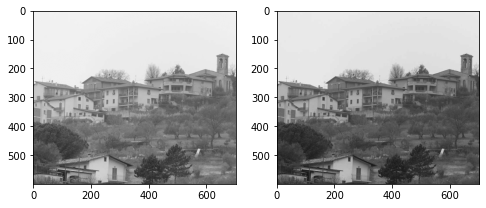

In [6]:
# Carga de la imagen y conversión a float:
town = cv2.imread("res/town.jpg",cv2.IMREAD_GRAYSCALE).astype(float)

# Normalización de los valores de los píxeles entre 0 y 1:
min_town, max_town = np.min(town), np.max(town)          
town_norm = (town - min_town) / (max_town - min_town)

# Cálculo de exponencial:
town_exp = np.exp(town_norm)

# Visualización de la imagen antes y después de aplicar la función :
print('\n Se muestran las imágenes antes y después de aplicar la función exponencial:')
plt.rcParams["figure.figsize"] = [8,8]
f, ax = plt.subplots(1,2)
ax[0].imshow(town_norm, cmap='gray')
ax[1].imshow(town_exp, cmap='gray')
plt.show()

El resultado tras aplicar la función exponencial se debe fundamentalmente a la compresión de valores de píxeles oscuros en el histograma y una expansión de valores de píxeles claros

### Ecualización de histograma
OpenCV dispone de la función `equalizeHist` para realizar la ecualización de histograma.

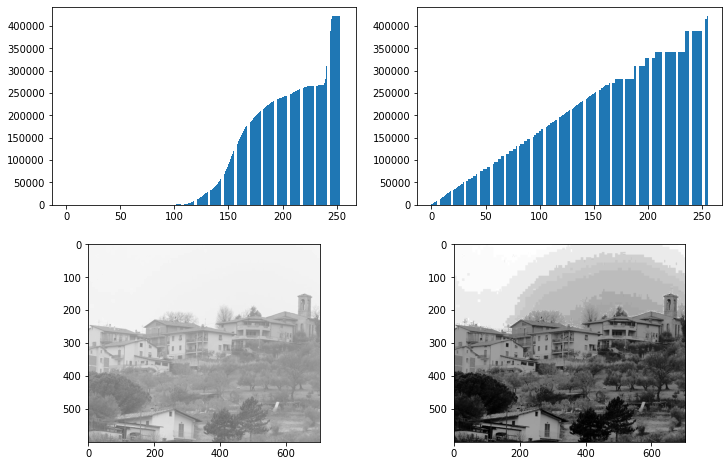

In [7]:
im = cv2.imread("res/town.jpg",cv2.IMREAD_GRAYSCALE)
hist, _ = np.histogram(im, 256, [0, 256]) 
cdf = hist.cumsum() # Histograma de frecuencia acumulada

im_eq = cv2.equalizeHist(im)
hist_eq, _ = np.histogram(im_eq, 256,[0,256]) 
cdf_eq = hist_eq.cumsum() # Histograma de frecuencia acumulada

plt.rcParams["figure.figsize"] = [12,8]
f, ax = plt.subplots(2,2)
ax[0,0].bar(range(0,256), cdf)
ax[0,1].bar(range(0,256), cdf_eq)
ax[1,0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1,1].imshow(im_eq, cmap='gray',vmin=0, vmax=255)
plt.show()



La función anterior permite mejorar el contraste en muchas regiones de la imagen. Sin embargo, en la zona del cielo los resultados no son los esperados. Esto es debido a que en la ecualización de histograma se tiene en cuenta el contraste global de la imagen. Una forma de mejorar los resultados en ciertas zonas es utilizando una ecualización local. 

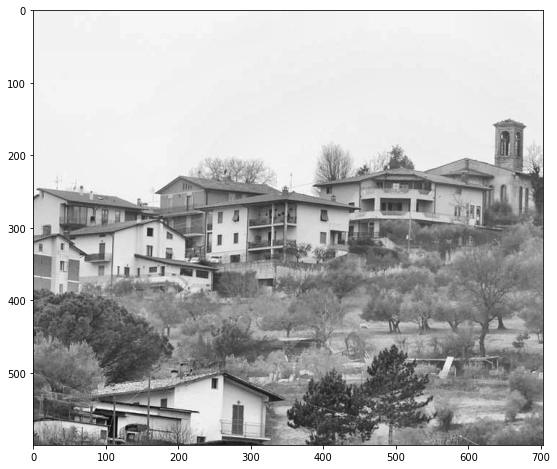

In [8]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(im)

plt.imshow(cl1,cmap='gray')
plt.show()

### Ejercicio
Aplica una expansión de histograma a la imagen `town.jpg`. Visualiza los histogramas resultantes de la ecualización global y de la expansión de histograma. Cuáles son las diferencias más significativas entre ambos?

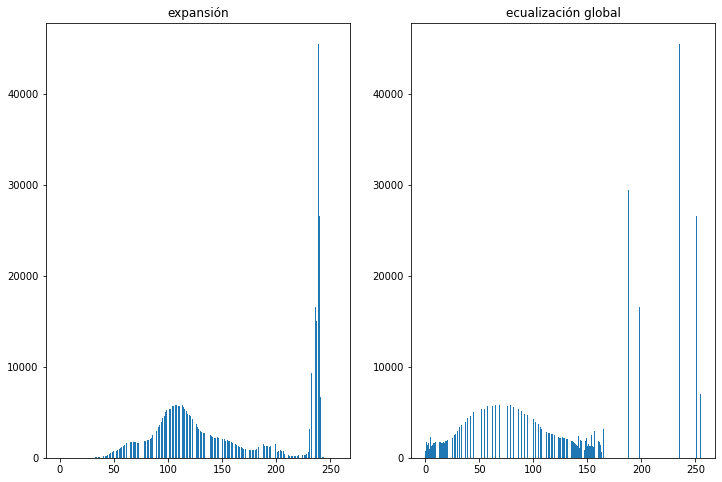

In [9]:
from skimage.exposure import rescale_intensity

# EXPANSIÓN DE HISTOGRAMA EN TOWN.JPG:

# Carga de la imagen y conversión a float:
town = cv2.imread("res/town.jpg",cv2.IMREAD_GRAYSCALE)
town_expansion = rescale_intensity(town, in_range='image', out_range=(0,255)).astype(np.uint8)

# Histograma:
hist_count_expansion, _ = np.histogram(town_expansion, 256, [0,256])

# ECUALIZACIÓN GLOBAL DE TOWN.JPG:
town_equalize = cv2.equalizeHist(town)

# Histograma de la ecualización global:
hist_count_equalize, _ = np.histogram(town_equalize, 256, [0,256])

# Visualización de los resultados:
plt.rcParams["figure.figsize"] = [12,8]
f, ax = plt.subplots(1,2)
ax[0].bar(range(0,256), hist_count_expansion)
ax[0].set_title('expansión')
ax[1].bar(range(0,256), hist_count_equalize)
ax[1].set_title('ecualización global')
plt.show()

En términos generales, se aprecia que en el caso de la expansión de histograma, hay un ligero desplazamiento de este hacia la izquierda con respecto al de la imagen "town" original. El número de píxeles con los niveles de intensidad comprendidos muestra una distribución similar a una normal, con un elevado número de píxeles que muestran valores elevados de regiones claras en la imagen, tal y como se observa a la derecha del histograma. Por su parte, para la ecualización global, tal y como se vio anteriormente, se logra una mejora en el contraste en varias regiones de la imagen. En consecuencia, se observa en el histograma una variación en la distribución de este, con un desplazamiento hacia la izquierda y ciertas regiones donde no hay un recuento de píxeles con esos niveles de intensidad. 